# Project (final assessment of STK 353)

Let's discuss the car datasets `2009_honda_accord`, `2009_hyundai_sonata`, and `2009_toyota_corolla`. These datasets contain customer reviews for three different car models from 2009.

1. As a stakeholder representing these companies, your objective is to determine which car has acheived the highest customer satisfaction rate among the three.

2. Additionally, you want to investigate whether the satisfaction rate for the Honda Accord has improved from 2008 to 2009. To answer this question, you will also need to analyze the dataset `2008_honda_accord`, which consists of customer reviews for the Honda Accord from the year 2008.

3. In the end, your final goal is to categorize the customer reviews for the Honda Accord (only those of the year 2008) into $k$ meaningful groups.

To answer the above questions, please consider the following points:
- a) Obtain the number of comments given in all four reviews and report the results.
- b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)
- c) During the cleaning process, you also need to remove numbers and HTML tags e.g. `<DOC>, <TEXT>, <AUTHOR>` and similar elements.
- d)  The first two questions can be solved using sentiment analysis techniques.
- e) Create appropriate `wordcloud`s for each part to visualize the most frequent words in the reviews.
- f) Determine the optimal value of $k$ from the set $\{2, 3, 4, 5\}$ in Question 3.
- g) (_optional_) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.
- h) (_optional_) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets `2008_honda_accord` and `2009_honda_accord` to cluster the reviews again, aiming for better results.

In [1]:
# Read the datasets
import pandas as pd

file_2009_honda_accord = open("2009_honda_accord", "r")
file_2009_hyundai_sonata = open("2009_hyundai_sonata", "r", encoding="cp1252")
file_2009_toyota_corolla = open("2009_toyota_corolla", "r", encoding="cp1252")
file_2008_honda_accord = open("2008_honda_accord", "r")

data_2009_honda_accord = file_2009_honda_accord.read()
data_2009_hyundai_sonata = file_2009_hyundai_sonata.read()
data_2009_toyota_corolla = file_2009_toyota_corolla.read()
data_2008_honda_accord = file_2008_honda_accord.read()

#a) Obtain the number of comments given in all four reviews and report the results. Shuaib

#Since all comments and their associated information are stored between <DOC> and </DOC> tags, we can count the number of <DOC> tags to get the number of comments for each review.

no_of_comments_2009_honda_accord = data_2009_honda_accord.count("<DOC>")
no_of_comments_2009_hyundai_sonata = data_2009_hyundai_sonata.count("<DOC>")
no_of_comments_2009_toyota_corolla = data_2009_toyota_corolla.count("<DOC>")
no_of_comments_2008_honda_accord = data_2008_honda_accord.count("<DOC>")

print(f"Number of Comments in the 2009 Honda Accord Review: {no_of_comments_2009_honda_accord}")
print(f"Number of Comments in the 2009 Hyundai Sonata Review: {no_of_comments_2009_hyundai_sonata}")
print(f"Number of Comments in the 2009 Toyota Corolla Review: {no_of_comments_2009_toyota_corolla}")
print(f"Number of Comments in the 2008 Honda Accord Review: {no_of_comments_2008_honda_accord}")


#b and c.)Clean the dataset Shuaib
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

#Remove the first lines from the datasets
data_2009_honda_accord='\n'.join(data_2009_honda_accord.split('\n')[1:])
data_2009_hyundai_sonata='\n'.join(data_2009_hyundai_sonata.split('\n')[1:])
data_2009_toyota_corolla='\n'.join(data_2009_toyota_corolla.split('\n')[1:])
data_2008_honda_accord='\n'.join(data_2008_honda_accord.split('\n')[1:])

def split_text_into_doc_sections(text):
    #This splits the data into a list based on the content between the doc tags. It also removes the <DOC> tags
    doc_sections = [section.replace('\n</DOC>', '') for section in text.split('<DOC>\n')[1:]]
    return doc_sections


def get_date(text):
    # Find the content within <DATE> and </DATE> tags
    start_tag = "<DATE>"
    end_tag = "</DATE>"
    start_index = text.find(start_tag) + len(start_tag)
    end_index = text.find(end_tag)
    return text[start_index:end_index]

def get_author(text):
    # Find the content within <AUTHOR> and </AUTHOR> tags
    start_tag = "<AUTHOR>"
    end_tag = "</AUTHOR>"
    start_index = text.find(start_tag) + len(start_tag)
    end_index = text.find(end_tag)
    return text[start_index:end_index]

def get_text(text):
    # Find the content within <TEXT> and </TEXT> tags
    start_tag = "<TEXT>"
    end_tag = "</TEXT>"
    start_index = text.find(start_tag) + len(start_tag)
    end_index = text.find(end_tag)
    return text[start_index:end_index]

def get_favorite(text):
    # Find the content within <FAVORITE> and </FAVORITE> tags
    start_tag = "<FAVORITE>"
    end_tag = "</FAVORITE>"
    start_index = text.find(start_tag) + len(start_tag)
    end_index = text.find(end_tag)
    return text[start_index:end_index]


# Download stopwords if not already downloaded
    nltk.download('wordnet')
    nltk.download('stopwords')
    
ENGLISH_STOPWORDS = set(stopwords.words('english'))             # Define English stopwords

# a custom list of English stopwords that are negation words (vital in reviews)
custom_stopwords = set(["not", "no", "never", "without", "can't", "won't"])

# Modify the clean_text function to use the remove_stopwords_with_negation function
def clean_text_with_negation(input_text):
    lower_text = input_text.lower()                               # Make text lowercase
    punc_and_numbers_chars = {c: " " for c in string.punctuation + "’“”0123456789"}
    changes = lower_text.maketrans(punc_and_numbers_chars)
    text_without_punc = lower_text.translate(changes)             # Remove punctuation and numbers
    
    def remove_stopwords_with_negation(text):
        return " ".join([curr_word for curr_word in text.split() if curr_word not in ENGLISH_STOPWORDS - custom_stopwords])

    text_without_stopwords = remove_stopwords_with_negation(text_without_punc)

    # Lemmatization - Using lemmatization rather than stemming is recommended
    # because, it retains valid words, preserves context and gives higher accuracy
    my_lemmatizer = WordNetLemmatizer()
    text_after_lemmatization = " ".join([my_lemmatizer.lemmatize(curr_word) for curr_word in text_without_stopwords.split()])
    return text_after_lemmatization

def process_text_to_dataframe(input_text):
    sections = split_text_into_doc_sections(input_text)
    data = []
    for section in sections:
        #<DOC>, <TEXT>, <AUTHOR> tags are removed here
        date = get_date(section)
        author = get_author(section)
        text = clean_text_with_negation(get_text(section))
        favorite = clean_text_with_negation(get_favorite(section))
        data.append([date, author, text, favorite])
    df = pd.DataFrame(data, columns=["Date", "Author", "Text", "Favorite"])
    return df



cleaned_dataframe_2009_honda_accord = process_text_to_dataframe(data_2009_honda_accord)
cleaned_dataframe_2009_hyundai_sonata = process_text_to_dataframe(data_2009_hyundai_sonata)
cleaned_dataframe_2009_toyota_corolla = process_text_to_dataframe(data_2009_toyota_corolla)
cleaned_dataframe_2008_honda_accord = pd.DataFrame([clean_text_with_negation(section) for section in split_text_into_doc_sections(data_2008_honda_accord)], columns=["Text"])

print("\nCleaned Datasets:")
print("2009_honda_accord")
print(cleaned_dataframe_2009_honda_accord)
print("2009_hyundai_sonata")
print(cleaned_dataframe_2009_hyundai_sonata)
print("2009_toyota_corolla")
print(cleaned_dataframe_2009_toyota_corolla)
print("2008_honda_accord")
print(cleaned_dataframe_2008_honda_accord)


Number of Comments in the 2009 Honda Accord Review: 224
Number of Comments in the 2009 Hyundai Sonata Review: 262
Number of Comments in the 2009 Toyota Corolla Review: 226
Number of Comments in the 2008 Honda Accord Review: 540

Cleaned Datasets:
2009_honda_accord
           Date     Author                                               Text  \
0    10/19/2009     pissed  mile new back break put leather fading inside ...   
1    10/18/2009       Asif  owned accord close year run beautifully happy ...   
2    10/17/2009        CBS  love larger size car took mi road trip last we...   
3    10/16/2009    violin8  bought th honda accord sorrier previous one ex...   
4    10/15/2009    sabs636  fell love new design look great drive well pur...   
..          ...        ...                                                ...   
219  07/03/2009  i_vtec_i4  rd accord lease navi went without navi save mo...   
220  07/02/2009      Rob C  owning vw jetta past year looked number car pr...   
221  0

In [28]:
cleaned_dataframe_2009_honda_accord

,Date,Author,Text,Favorite
0,10/19/2009,pissed,mile new back break put leather fading inside ...,power cl great seat comfortable great c
1,10/18/2009,Asif,owned accord close year run beautifully happy ...,
2,10/17/2009,CBS,love larger size car took mi road trip last we...,leather seat stereo
3,10/16/2009,violin8,bought th honda accord sorrier previous one ex...,color
4,10/15/2009,sabs636,fell love new design look great drive well pur...,exterior interior look wide variety feature ma...
...,...,...,...,...
219,07/03/2009,i_vtec_i4,rd accord lease navi went without navi save mo...,increased horsepower new instrument panel radi...
220,07/02/2009,Rob C,owning vw jetta past year looked number car pr...,handling mid large sedan interior design stora...
221,07/02/2009,Don,owned accord month overall nice car interior r...,always little thing count aux outlet ipod v po...
222,07/01/2009,CGS,bought car least expensive option satisfied ne...,suspension road handling xm radio fun play tec...


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer

sent_analyzer = SentimentIntensityAnalyzer()       # initializing the sentiment analyzer

# sentiment_scores = sent_analyzer.polarity_scores(cleaned_dataframe_2008_honda_accord.Text)

sentiment_scores_2008 = cleaned_dataframe_2008_honda_accord['Text'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])
sentiment_scores_2009 = cleaned_dataframe_2009_honda_accord['Text'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

def get_sentiment_description(sentiment_scores):
    sentiment_descriptions = []
    for score in sentiment_scores:
        if score >= 0.05:
            sentiment_descriptions.append('positive')
        elif score <= -0.05:
            sentiment_descriptions.append('negative')
        else:
            sentiment_descriptions.append('neutral')
    return sentiment_descriptions

sentiment_description_2008 = get_sentiment_description(sentiment_scores_2008)
sentiment_description_2009 = get_sentiment_description(sentiment_scores_2009)

cleaned_dataframe_2008_honda_accord['Sentiment_Scores'] = sentiment_scores_2008
cleaned_dataframe_2008_honda_accord['Sentiment_Description'] = sentiment_description_2008

cleaned_dataframe_2009_honda_accord['Sentiment_Scores'] = sentiment_scores_2009
cleaned_dataframe_2009_honda_accord['Sentiment_Description'] = sentiment_description_2009

In [88]:
cleaned_dataframe_2008_honda_accord

,Text,Sentiment_Scores,ClusterLabel,Sentiment_Description
0,turned k still pleased nd set tire week ago pu...,0.4588,2,positive
1,owned three vehicle prior accord first love ma...,0.9851,1,positive
2,purchased honda accord v due review car worst ...,-0.6486,2,negative
3,leased accord april mile noticed heater not wo...,-0.1774,2,negative
4,overall pretty nice car model consistent issue...,0.8402,2,positive
...,...,...,...,...
535,not quiet lexus quiet enough not cushy lexus c...,-0.1477,1,negative
536,gm truck lease year coming end z tahoe lease a...,0.9670,2,positive
537,rd accord owned past model year great car litt...,0.8176,1,positive
538,love love love hp uncertain going back smaller...,0.9559,2,positive


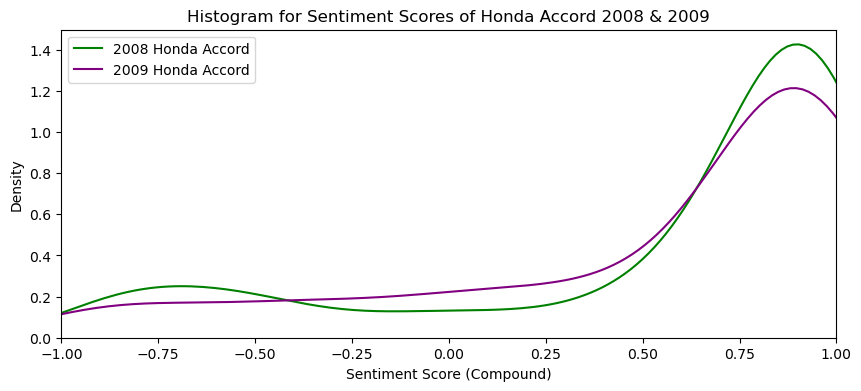

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

result1 = cleaned_dataframe_2008_honda_accord['Sentiment_Scores']
result2 = cleaned_dataframe_2009_honda_accord['Sentiment_Scores']

plt.figure(figsize=(10, 4))
sns.kdeplot(result1, label='2008 Honda Accord', color='green')
sns.kdeplot(result2, label='2009 Honda Accord', color='purple')
plt.xlabel('Sentiment Score (Compound)')
plt.xlim(-1,1)
plt.legend()
plt.title('Histogram for Sentiment Scores of Honda Accord 2008 & 2009')
plt.show()

In [4]:
# Computing the average sentiment scores for each period
average_score_2008 = sum(result1) / len(result1)
average_score_2009 = sum(result2) / len(result2)

# Comparing the average scores and determine the improvement
if average_score_2009 > average_score_2008:
    print("The satisfaction rate for the Honda Accord has improved from 2008 to 2009.")
elif average_score_2009 < average_score_2008:
    print("The satisfaction rate for the Honda Accord has decreased from 2008 to 2009.")
else:
    print("The satisfaction rate for the Honda Accord remains the same from 2008 to 2009.")
print("2008 score:",average_score_2008, "2009 score:", average_score_2009)

The satisfaction rate for the Honda Accord has decreased from 2008 to 2009.
2008 score: 0.5384305555555551 2009 score: 0.5240218750000001


### Since the sentiment compound score drops from 0.538(2008) to 0.524(2009) thus customer satisfaction has not improved but rather decreased.

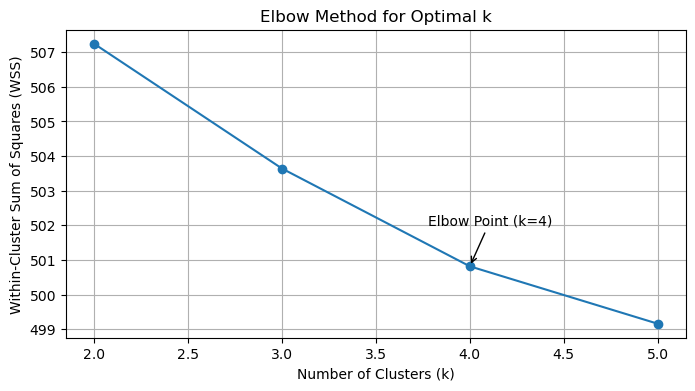

The optimal number of clusters is 4 based on the elbow point method.
Cluster labels assigned to reviews:
                                                  Text  ClusterLabel
0    turned k still pleased nd set tire week ago pu...             4
1    owned three vehicle prior accord first love ma...             2
2    purchased honda accord v due review car worst ...             4
3    leased accord april mile noticed heater not wo...             4
4    overall pretty nice car model consistent issue...             4
..                                                 ...           ...
535  not quiet lexus quiet enough not cushy lexus c...             2
536  gm truck lease year coming end z tahoe lease a...             3
537  rd accord owned past model year great car litt...             1
538  love love love hp uncertain going back smaller...             3
539  driving accord v year previously accord coupe ...             2

[540 rows x 2 columns]
Cluster centres: [[0.         0.         0.

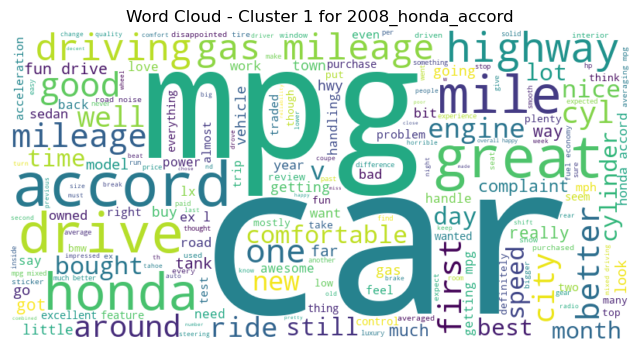

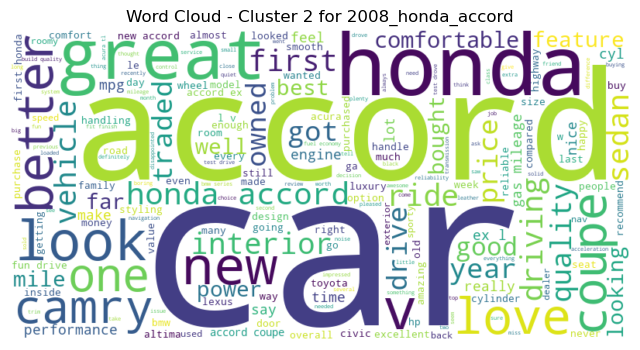

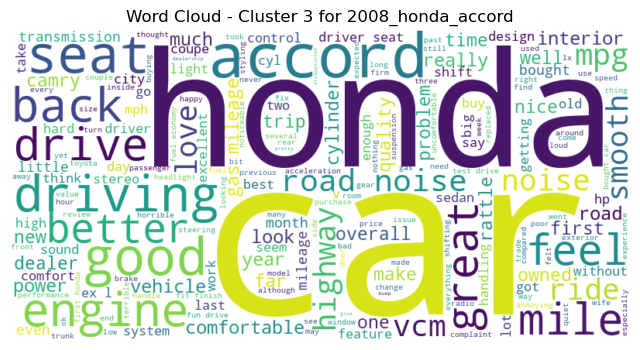

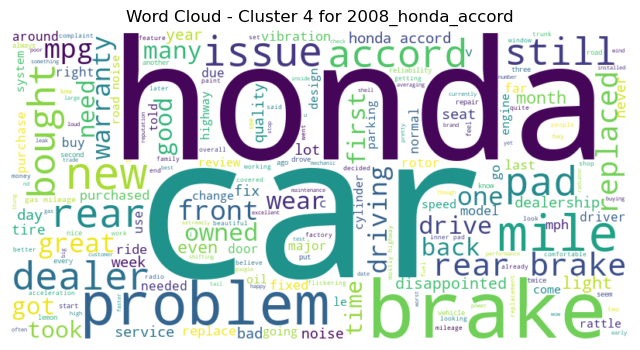

In [19]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# having a DataFrame '2008_honda_accord' with a "Text" column
reviews = cleaned_dataframe_2008_honda_accord["Text"]

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

# Determine the optimal number of clusters (k) using the Elbow Method
k_values = [2, 3, 4, 5]  # Adjust the range of k values

wss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=4, n_init=50)
    kmeans.fit(tfidf_matrix)
    wss_values.append(kmeans.inertia_)

# Plot the WSS vs. the number of clusters
plt.figure(figsize=(8, 4))
plt.plot(k_values, wss_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Find the elbow point
elbow_point = np.argmax(np.diff(wss_values)) + 2  # Adding 2 because we started with k=2

# Mark the elbow point on the plot
plt.annotate(f'Elbow Point (k={elbow_point})', (elbow_point, wss_values[elbow_point - 2]),
             xytext=(-30, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', lw=1))

plt.show()

print(f"The optimal number of clusters is {elbow_point} based on the elbow point method.")

# Use the optimal number of clusters to perform KMeans clustering
optimal_kmeans = KMeans(n_clusters=elbow_point, random_state=0, n_init=10)
optimal_kmeans.fit(tfidf_matrix)

# Add the cluster labels to the DataFrame
clusters = optimal_kmeans.labels_
centers = optimal_kmeans.cluster_centers_
cleaned_dataframe_2008_honda_accord["ClusterLabel"] = clusters + 1 # We add the clusters with 1 since it starts from 0.

# Print the results
print("Cluster labels assigned to reviews:")
print(cleaned_dataframe_2008_honda_accord[["Text", "ClusterLabel"]])
print("Cluster centres:", centers)
print(cleaned_dataframe_2008_honda_accord[["Text", "ClusterLabel"]])

#e) Create appropriate wordclouds for each part to visualize the most frequent words in the reviews


# Create word clouds for each cluster
for cluster in range(1, elbow_point+1):
    cluster_reviews = cleaned_dataframe_2008_honda_accord[cleaned_dataframe_2008_honda_accord['ClusterLabel'] == cluster]
    generate_word_cloud(cluster_reviews['Text'], f'Word Cloud - Cluster {cluster} for 2008_honda_accord')

In [6]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=50)
    kmeans.fit(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is: {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is: 0.0115100625978125
For n_clusters = 3, the average silhouette_score is: 0.009660348037819476
For n_clusters = 4, the average silhouette_score is: 0.00999050011356696
For n_clusters = 5, the average silhouette_score is: 0.008952143498921952


Now we try combining the comments from  the 2008 and 2009 Honda Accord datasets to see if it improves the results.


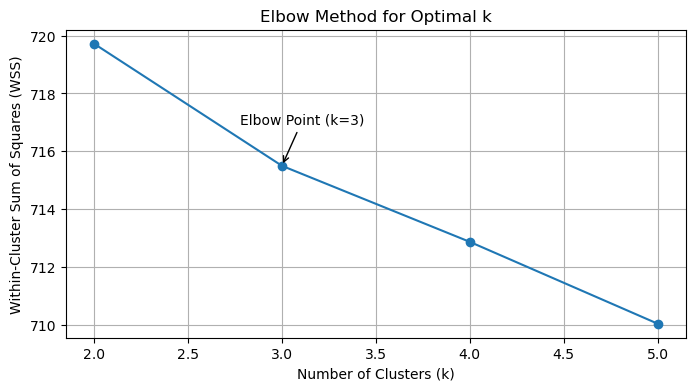

Optimal number of clusters (k): 3
Cluster labels assigned to reviews:
                                                  Text  ClusterLabel
0    turned k still pleased nd set tire week ago pu...             1
1    owned three vehicle prior accord first love ma...             3
2    purchased honda accord v due review car worst ...             1
3    leased accord april mile noticed heater not wo...             2
4    overall pretty nice car model consistent issue...             1
..                                                 ...           ...
219  rd accord lease navi went without navi save mo...             2
220  owning vw jetta past year looked number car pr...             3
221  owned accord month overall nice car interior r...             2
222  bought car least expensive option satisfied ne...             2
223  traded camry went get back day sold accord dri...             2

[764 rows x 2 columns]
For n_clusters = 3, the average silhouette_score is: 0.006006831288927485
WSS:

In [20]:
#h) (optional) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets 2008_honda_accord and 2009_honda_accord to cluster the reviews again, aiming for better results.

print("Now we try combining the comments from  the 2008 and 2009 Honda Accord datasets to see if it improves the results.")
# Combine the datasets
combined_dataset = pd.concat([cleaned_dataframe_2008_honda_accord , cleaned_dataframe_2009_honda_accord ])

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_dataset['Text'])

# Determine the optimal number of clusters (k)
k_values = range(2, 6)
wss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=50)
    kmeans.fit(tfidf_matrix)
    wss_values.append(kmeans.inertia_)

# Plot the WSS vs. the number of clusters to find the elbow point
plt.figure(figsize=(8, 4))
plt.plot(k_values, wss_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Find the elbow point
elbow_point = np.argmax(np.diff(wss_values)) + 2
plt.annotate(f'Elbow Point (k={elbow_point})', (elbow_point, wss_values[elbow_point - 2]),
             xytext=(-30, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', lw=1))
plt.show()

# Optimal number of clusters is at the elbow point
print(f'Optimal number of clusters (k): {elbow_point}')

# Use the optimal number of clusters to perform KMeans clustering
optimal_kmeans = KMeans(n_clusters=elbow_point, random_state=13, n_init=50)
optimal_kmeans.fit(tfidf_matrix)

# Add the cluster labels to the DataFrame
clusters = optimal_kmeans.labels_
combined_dataset["ClusterLabel"] = clusters + 1 # We add the clusters with 1 since it starts from 0.

print("Cluster labels assigned to reviews:")
print(combined_dataset[["Text", "ClusterLabel"]])


# Silhouette score evaluation

from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise

silhouette_avg = silhouette_score(tfidf_matrix, optimal_kmeans.labels_)
print(f"For n_clusters = {elbow_point}, the average silhouette_score is: {silhouette_avg}")


wss = optimal_kmeans.inertia_


# Calculating the TSS
tss = np.sum(pairwise_distances(tfidf_matrix, squared=True))

# Calculate the BSS
centroids = optimal_kmeans.cluster_centers_
bss = tss-wss

# Calculate the explained variance ratio
explained_variance_ratio = (bss / tss)

# Print the results
print(f"WSS: {wss}")
print(f"TSS: {tss}")
print(f"BSS: {bss}")
print(f"Explained Variance Ratio: {explained_variance_ratio}")

print("We see that the average silhouette_score has increased when we incorporated the 2008_honda_accord and 2009_honda_accord datasets. Therefore our results have improved and the clustering was better.")

In [11]:
#g) (optional) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.

from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise

print("Evaluation Metrics")

silhouette_avg = silhouette_score(tfidf_matrix, optimal_kmeans.labels_)
print(f"For n_clusters = {elbow_point}, the average silhouette_score is: {silhouette_avg}")


wss = optimal_kmeans.inertia_


# Calculating the TSS
tss = np.sum(pairwise_distances(tfidf_matrix, squared=True))

# Calculate the BSS
centroids = optimal_kmeans.cluster_centers_
bss = tss-wss

# Calculate the explained variance ratio
explained_variance_ratio = (bss / tss)

# Print the results
print(f"WSS: {wss}")
print(f"TSS: {tss}")
print(f"BSS: {bss}")
print(f"Explained Variance Ratio: {explained_variance_ratio}")


Evaluation Metrics
For n_clusters = 4, the average silhouette_score is: 0.004692236426265664
WSS: 501.88805589807896
TSS: 552393.0521059809
BSS: 551891.1640500828
Explained Variance Ratio: 0.9990914294559197


In [90]:
# Use the optimal number of clusters to perform KMeans clustering
optimal_kmeans = KMeans(n_clusters=elbow_point, random_state=0)
optimal_kmeans.fit(tfidf_matrix)

# Add the cluster labels to the DataFrame
clusters = optimal_kmeans.labels_
cleaned_dataframe_2008_honda_accord["ClusterLabel"] = clusters + 1 # We add the clusters with 1 since it starts from 0.

# Print the results
print("Optimal number of clusters (k):", elbow_point)
print("Cluster labels assigned to reviews:")
print(cleaned_dataframe_2008_honda_accord[["Text", "ClusterLabel"]])

/Users/marcusnkadimeng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal number of clusters (k): 2
Cluster labels assigned to reviews:
                                                  Text  ClusterLabel
0    turned k still pleased nd set tire week ago pu...             2
1    owned three vehicle prior accord first love ma...             1
2    purchased honda accord v due review car worst ...             2
3    leased accord april mile noticed heater not wo...             2
4    overall pretty nice car model consistent issue...             2
..                                                 ...           ...
535  not quiet lexus quiet enough not cushy lexus c...             1
536  gm truck lease year coming end z tahoe lease a...             1
537  rd accord owned past model year great car litt...             1
538  love love love hp uncertain going back smaller...             2
539  driving accord v year previously accord coupe ...             1

[540 rows x 2 columns]


In [91]:
cleaned_dataframe_2008_honda_accord

,Text,Sentiment_Scores,ClusterLabel,Sentiment_Description
0,turned k still pleased nd set tire week ago pu...,0.4588,2,positive
1,owned three vehicle prior accord first love ma...,0.9851,1,positive
2,purchased honda accord v due review car worst ...,-0.6486,2,negative
3,leased accord april mile noticed heater not wo...,-0.1774,2,negative
4,overall pretty nice car model consistent issue...,0.8402,2,positive
...,...,...,...,...
535,not quiet lexus quiet enough not cushy lexus c...,-0.1477,1,negative
536,gm truck lease year coming end z tahoe lease a...,0.9670,1,positive
537,rd accord owned past model year great car litt...,0.8176,1,positive
538,love love love hp uncertain going back smaller...,0.9559,2,positive


In [16]:
#1.)As a stakeholder representing these companies, your objective is to determine which car has acheived the highest customer satisfaction rate among the three.Dana
#Analyzing Sentiments

from textblob import TextBlob

# Define a function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

# Apply sentiment analysis to each dataset
cleaned_dataframe_2009_honda_accord['Sentiment'] = cleaned_dataframe_2009_honda_accord['Text'].apply(analyze_sentiment)
cleaned_dataframe_2009_hyundai_sonata['Sentiment'] = cleaned_dataframe_2009_hyundai_sonata['Text'].apply(analyze_sentiment)
cleaned_dataframe_2009_toyota_corolla['Sentiment'] = cleaned_dataframe_2009_toyota_corolla['Text'].apply(analyze_sentiment)

# e) Calculate the average sentiment for each dataset
def calculate_sentiment(dataframe):
    sentiment_counts = dataframe['Sentiment'].value_counts()
    total = len(dataframe)
    return {
        'Positive': sentiment_counts.get('positive', 0) / total,
        'Neutral': sentiment_counts.get('neutral', 0) / total,
        'Negative': sentiment_counts.get('negative', 0) / total
    }

sentiment_2009_honda_accord = calculate_sentiment(cleaned_dataframe_2009_honda_accord)
sentiment_2009_hyundai_sonata = calculate_sentiment(cleaned_dataframe_2009_hyundai_sonata)
sentiment_2009_toyota_corolla = calculate_sentiment(cleaned_dataframe_2009_toyota_corolla)


# Calculate the weighted sentiment for each dataset
def calculate_weighted_sentiment(dataframe):
    sentiment_counts = dataframe['Sentiment'].value_counts()
    total = len(dataframe)

    # Assign weights based on the total number of reviews
    weights = total / sum(total for total in [len(cleaned_dataframe_2009_honda_accord), len(cleaned_dataframe_2009_hyundai_sonata), len(cleaned_dataframe_2009_toyota_corolla)])

    weighted_sentiment = {
        'Positive': (sentiment_counts.get('positive', 0) / total) * weights,
        'Neutral': (sentiment_counts.get('neutral', 0) / total) * weights,
        'Negative': (sentiment_counts.get('negative', 0) / total) * weights
    }

    return weighted_sentiment

weighted_sentiment_2009_honda_accord = calculate_weighted_sentiment(cleaned_dataframe_2009_honda_accord)
weighted_sentiment_2009_hyundai_sonata = calculate_weighted_sentiment(cleaned_dataframe_2009_hyundai_sonata)
weighted_sentiment_2009_toyota_corolla = calculate_weighted_sentiment(cleaned_dataframe_2009_toyota_corolla)


print("Weighted Sentiment for 2009 Honda Accord:")
print(weighted_sentiment_2009_honda_accord)

print("Weighted Sentiment for 2009 Hyundai Sonata:")
print(weighted_sentiment_2009_hyundai_sonata)

print("Weighted Sentiment for 2009 Toyota Corolla:")
print(weighted_sentiment_2009_toyota_corolla)

Weighted Sentiment for 2009 Honda Accord:
{'Positive': 0.25702247191011235, 'Neutral': 0.0028089887640449437, 'Negative': 0.0547752808988764}
Weighted Sentiment for 2009 Hyundai Sonata:
{'Positive': 0.3441011235955056, 'Neutral': 0.0014044943820224719, 'Negative': 0.02247191011235955}
Weighted Sentiment for 2009 Toyota Corolla:
{'Positive': 0.2794943820224719, 'Neutral': 0.0, 'Negative': 0.037921348314606744}


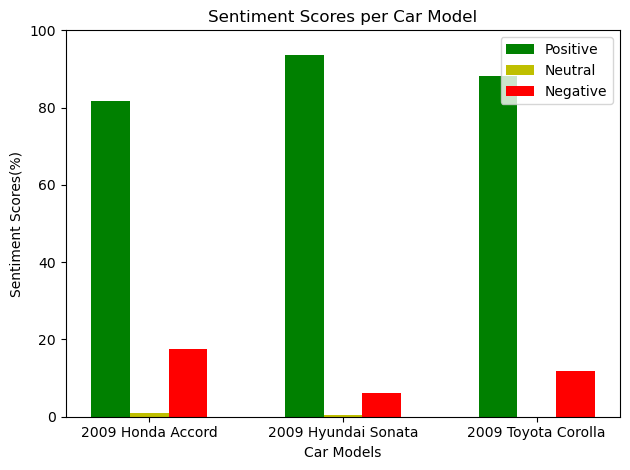

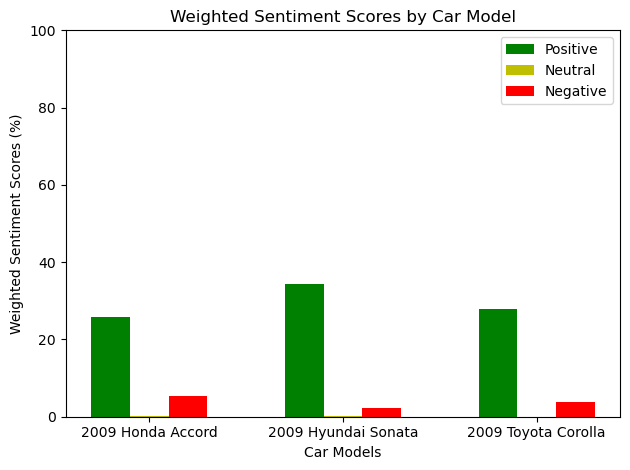

based on the above graph, Hyundai Sonta recieved the best customer satisfaction rate as they had the highest amount of positive reviews and the lowest amount of negative reviews 


In [17]:
# Define car models and their corresponding weighted sentiment scores
car_models = ["2009 Honda Accord", "2009 Hyundai Sonata", "2009 Toyota Corolla"]

positive_scores = [sentiment_2009_honda_accord['Positive'], sentiment_2009_hyundai_sonata['Positive'], sentiment_2009_toyota_corolla['Positive']]
neutral_scores = [sentiment_2009_honda_accord['Neutral'], sentiment_2009_hyundai_sonata['Neutral'], sentiment_2009_toyota_corolla['Neutral']]
negative_scores = [sentiment_2009_honda_accord['Negative'], sentiment_2009_hyundai_sonata['Negative'], sentiment_2009_toyota_corolla['Negative']]

# Convert scores to percentages (multiply by 100)
positive_scores = [score * 100 for score in positive_scores]
neutral_scores = [score * 100 for score in neutral_scores]
negative_scores = [score * 100 for score in negative_scores]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(car_models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar plots for positive, neutral, and negative sentiment scores
plt.bar(r1, positive_scores, width=bar_width, label='Positive', color='g')
plt.bar(r2, neutral_scores, width=bar_width, label='Neutral', color='y')
plt.bar(r3, negative_scores, width=bar_width, label='Negative', color='r')

# Set labels, title, and legend
plt.xlabel('Car Models')
plt.ylabel('Sentiment Scores(%)')
plt.title('Sentiment Scores per Car Model')
plt.xticks([x + bar_width for x in r1], car_models)
plt.legend()

# Set the y-axis scale to 100%
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()
plt.show()

#Weighted Sentiment Graph
positive_scores = [weighted_sentiment_2009_honda_accord['Positive'], weighted_sentiment_2009_hyundai_sonata['Positive'], weighted_sentiment_2009_toyota_corolla['Positive']]
neutral_scores = [weighted_sentiment_2009_honda_accord['Neutral'], weighted_sentiment_2009_hyundai_sonata['Neutral'], weighted_sentiment_2009_toyota_corolla['Neutral']]
negative_scores = [weighted_sentiment_2009_honda_accord['Negative'], weighted_sentiment_2009_hyundai_sonata['Negative'], weighted_sentiment_2009_toyota_corolla['Negative']]


# Convert scores to percentages (multiply by 100)
positive_scores = [score * 100 for score in positive_scores]
neutral_scores = [score * 100 for score in neutral_scores]
negative_scores = [score * 100 for score in negative_scores]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(car_models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar plots for positive, neutral, and negative sentiment scores
plt.bar(r1, positive_scores, width=bar_width, label='Positive', color='g')
plt.bar(r2, neutral_scores, width=bar_width, label='Neutral', color='y')
plt.bar(r3, negative_scores, width=bar_width, label='Negative', color='r')

# Set labels, title, and legend
plt.xlabel('Car Models')
plt.ylabel('Weighted Sentiment Scores (%)')
plt.title('Weighted Sentiment Scores by Car Model')
plt.xticks([x + bar_width for x in r1], car_models)
plt.legend()

# Set the y-axis scale to 100%
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()
plt.show()

print("based on the above graph, Hyundai Sonta recieved the best customer satisfaction rate as they had the highest amount of positive reviews and the lowest amount of negative reviews ")


In [12]:
print("Based on the above graph, Hyundai Sonata received the best customer satisfaction rate, as it had the highest percentage of positive reviews and the lowest percentage of negative reviews.")

Based on the above graph, Hyundai Sonata received the best customer satisfaction rate, as it had the highest percentage of positive reviews and the lowest percentage of negative reviews.


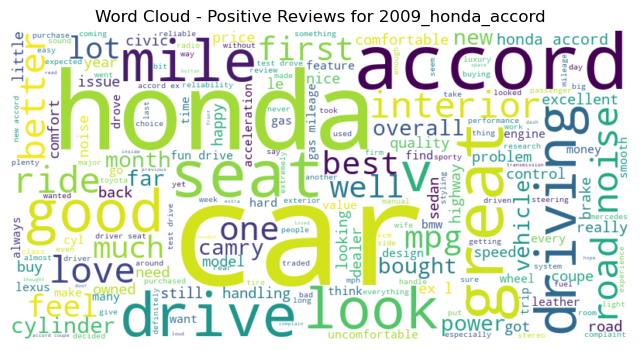

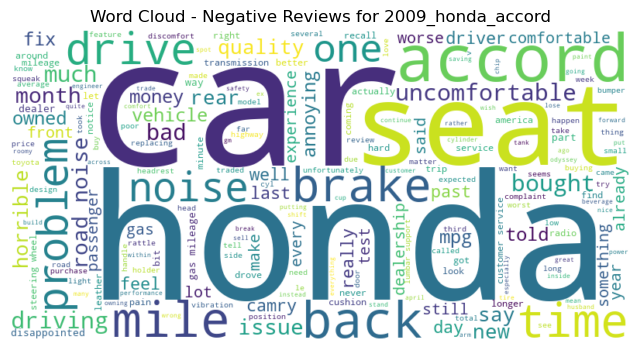

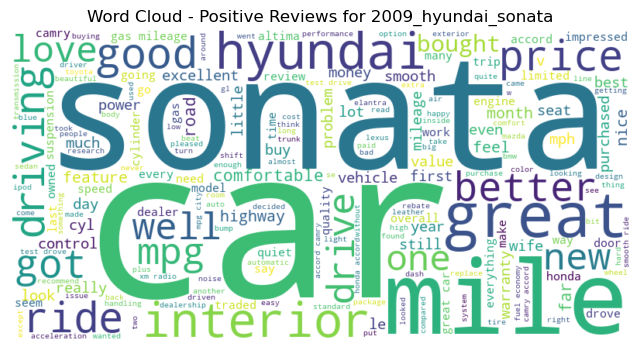

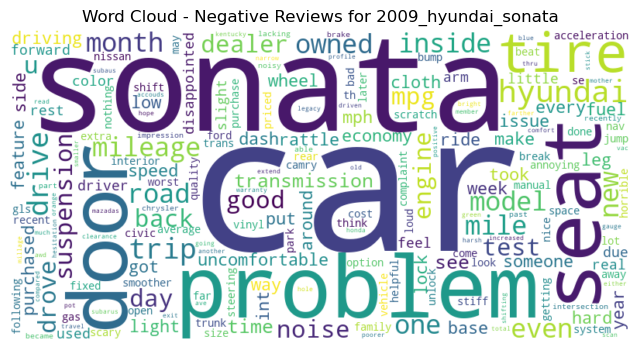

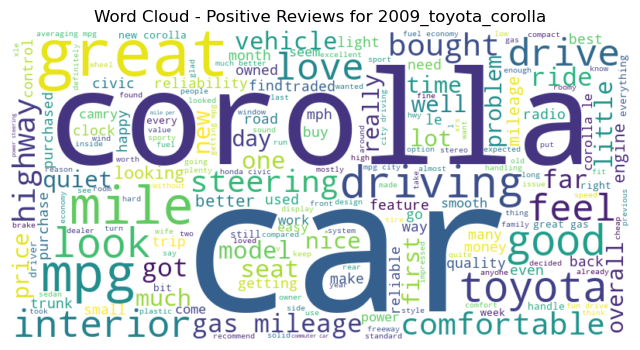

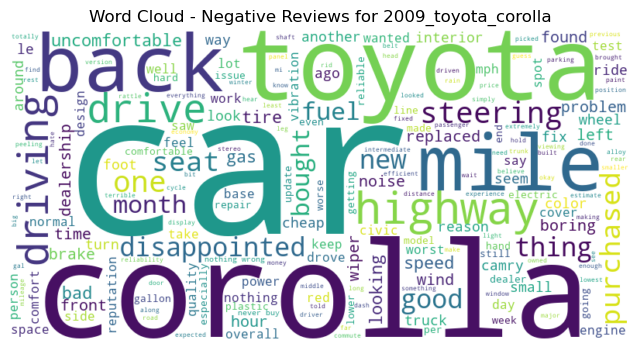

In [18]:
#e) Create appropriate wordclouds for each part to visualize the most frequent words in the reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

    # Create a list of dataset filenames
datasets = {"2009_honda_accord":cleaned_dataframe_2009_honda_accord, "2009_hyundai_sonata":cleaned_dataframe_2009_hyundai_sonata, "2009_toyota_corolla":cleaned_dataframe_2009_toyota_corolla}

for dataset_name, dataset in datasets.items():

    # Create separate DataFrames for negative and positive reviews
    positive_reviews = dataset[dataset['Sentiment'] == 'positive']
    negative_reviews = dataset[dataset['Sentiment'] == 'negative']

    # Generate and display word clouds for negative and positive reviews
    generate_word_cloud(positive_reviews['Text'], f'Word Cloud - Positive Reviews for {dataset_name}')
    generate_word_cloud(negative_reviews['Text'], f'Word Cloud - Negative Reviews for {dataset_name}')